# Chapter 8: Integration

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://link.springer.com/book/10.1007/979-8-8688-0413-7) (ISBN 979-8-8688-0412-0).

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.sans-serif"] = "stix"

In [2]:
import numpy as np

In [3]:
from scipy import integrate

In [4]:
import mpmath
import sympy

In [5]:
sympy.init_printing()

# Simpson's rule

In [6]:
a, b, X = sympy.symbols("a, b, x")
f = sympy.Function("f")

In [7]:
# x = a, (a+b)/3, 2 * (a+b)/3, b # 3rd order quadrature rule
x = a, (a + b) / 2, b  # simpson's rule
# x = a, b # trapezoid rule
# x = ((b+a)/2,)  # mid-point rule

In [8]:
w = [sympy.symbols("w_%d" % i) for i in range(len(x))]

In [9]:
q_rule = sum([w[i] * f(x[i]) for i in range(len(x))])

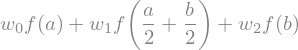

In [10]:
q_rule

In [11]:
phi = [sympy.Lambda(X, X**n) for n in range(len(x))]

In [12]:
phi

In [13]:
eqs = [
    q_rule.subs(f, phi[n]) - sympy.integrate(phi[n](X), (X, a, b))
    for n in range(len(phi))
]

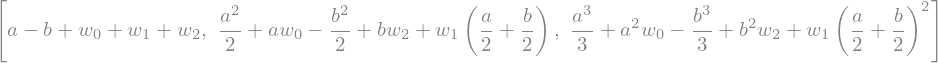

In [14]:
eqs

In [15]:
w_sol = sympy.solve(eqs, w)

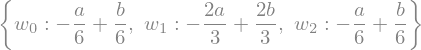

In [16]:
w_sol

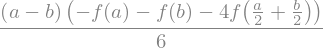

In [17]:
q_rule.subs(w_sol).simplify()

## SciPy `integrate`

### Simple integration example

In [18]:
def f(x):
    return np.exp(-(x**2))

In [19]:
val, err = integrate.quad(f, -1, 1)

In [20]:
val

In [21]:
err

### Extra arguments

In [22]:
def f(x, a, b, c):
    return a * np.exp(-(((x - b) / c) ** 2))

In [23]:
val, err = integrate.quad(f, -1, 1, args=(1, 2, 3))

In [24]:
val

In [25]:
err

### Reshuffle arguments

In [26]:
from scipy.special import jv

In [27]:
val, err = integrate.quad(lambda x: jv(0, x), 0, 5)

In [28]:
val

In [29]:
err

### Infinite limits 

In [30]:
f = lambda x: np.exp(-(x**2))

In [31]:
val, err = integrate.quad(f, -np.inf, np.inf)

In [32]:
val

In [33]:
err

### Singularity

In [34]:
f = lambda x: 1 / np.sqrt(abs(x))

In [35]:
a, b = -1, 1

In [36]:
integrate.quad(f, a, b)

/tmp/ipykernel_46514/525825373.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  f = lambda x: 1/np.sqrt(abs(x))


In [37]:
integrate.quad(f, a, b, points=[0])

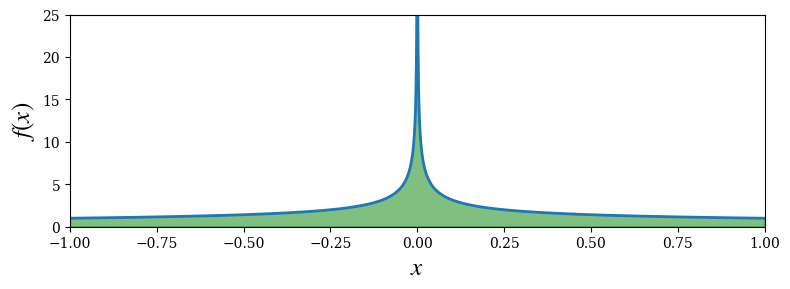

In [38]:
fig, ax = plt.subplots(figsize=(8, 3))

x = np.linspace(a, b, 10000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color="green", alpha=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0, 25)
ax.set_xlim(-1, 1)

fig.tight_layout()
fig.savefig("ch8-diverging-integrand.pdf")

## Tabulated integrand

In [39]:
f = lambda x: np.sqrt(x)

In [40]:
a, b = 0, 2

In [41]:
x = np.linspace(a, b, 25)

In [42]:
y = f(x)

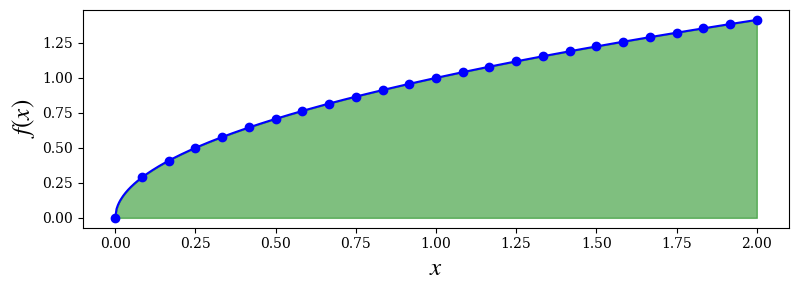

In [43]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, "bo")
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), "b-")
ax.fill_between(xx, f(xx), color="green", alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)
fig.tight_layout()
fig.savefig("ch8-tabulated-integrand.pdf")

In [44]:
val_trapz = integrate.trapezoid(y, x)

In [45]:
val_trapz

In [46]:
val_simps = integrate.simpson(y, x)

In [47]:
val_simps

In [48]:
val_exact = 2.0 / 3.0 * (b - a) ** (3.0 / 2.0)

In [49]:
val_exact

In [50]:
val_exact - val_trapz

In [51]:
val_exact - val_simps

In [52]:
x = np.linspace(a, b, 1 + 2**6)

In [53]:
len(x)

In [54]:
y = f(x)

In [55]:
val_exact - integrate.romb(y, dx=(x[1] - x[0]))

In [56]:
val_exact - integrate.simpson(y, dx=x[1] - x[0])

## Higher dimension

In [57]:
def f(x):
    return np.exp(-(x**2))

In [58]:
%time integrate.quad(f, a, b)

CPU times: user 47 μs, sys: 5 μs, total: 52 μs
Wall time: 55.8 μs


In [59]:
def f(x, y):
    return np.exp(-(x**2) - y**2)

In [60]:
a, b = 0, 1

In [61]:
g = lambda x: 0

In [62]:
h = lambda x: 1

In [63]:
integrate.dblquad(f, a, b, g, h)

In [64]:
integrate.dblquad(lambda x, y: np.exp(-(x**2) - y**2), 0, 1, lambda x: 0, lambda x: 1)

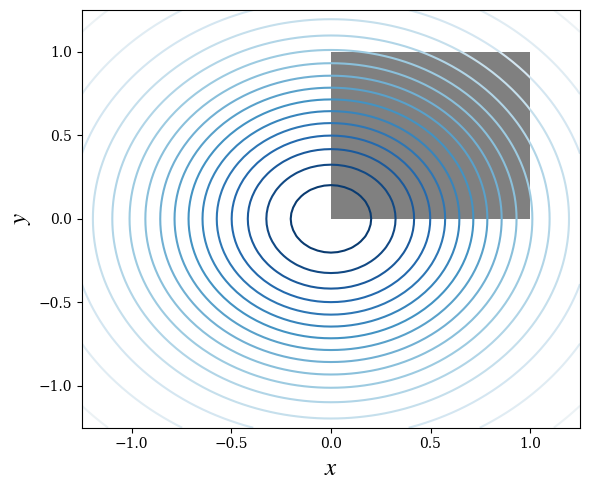

In [65]:
fig, ax = plt.subplots(figsize=(6, 5))

x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np.meshgrid(x, y)

c = ax.contour(X, Y, f(X, Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

bound_rect = plt.Rectangle((0, 0), 1, 1, facecolor="grey")
ax.add_patch(bound_rect)

ax.axis("tight")
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)

fig.tight_layout()
fig.savefig("ch8-multi-dim-integrand.pdf")

In [66]:
integrate.dblquad(f, 0, 1, lambda x: -1 + x, lambda x: 1 - x)

In [67]:
def f(x, y, z):
    return np.exp(-(x**2) - y**2 - z**2)

In [68]:
integrate.tplquad(f, 0, 1, lambda x: 0, lambda x: 1, lambda x, y: 0, lambda x, y: 1)

In [69]:
integrate.nquad(f, [(0, 1), (0, 1), (0, 1)])

### nquad

In [70]:
def f(*args):
    return np.exp(-np.sum(np.array(args) ** 2))

In [71]:
%time integrate.nquad(f, [(0,1)] * 1)

CPU times: user 142 μs, sys: 15 μs, total: 157 μs
Wall time: 160 μs


In [72]:
%time integrate.nquad(f, [(0,1)] * 2)

CPU times: user 1.49 ms, sys: 0 ns, total: 1.49 ms
Wall time: 1.5 ms


In [73]:
%time integrate.nquad(f, [(0,1)] * 3)

CPU times: user 46.6 ms, sys: 17 μs, total: 46.6 ms
Wall time: 46.1 ms


In [74]:
%time integrate.nquad(f, [(0,1)] * 4)

CPU times: user 662 ms, sys: 59 μs, total: 662 ms
Wall time: 662 ms


In [75]:
%time integrate.nquad(f, [(0,1)] * 5)

CPU times: user 13.1 s, sys: 283 μs, total: 13.1 s
Wall time: 13.1 s


### Monte Carlo integration

In [76]:
from skmonaco import mcquad

In [77]:
%time val, err = mcquad(f, xl=np.zeros(5), xu=np.ones(5), npoints=100000)

CPU times: user 327 ms, sys: 0 ns, total: 327 ms
Wall time: 328 ms


In [78]:
val, err

In [79]:
%time val, err = mcquad(f, xl=np.zeros(10), xu=np.ones(10), npoints=100000)

CPU times: user 317 ms, sys: 13 μs, total: 317 ms
Wall time: 316 ms


In [80]:
val, err

## Symbolic and multi-precision quadrature

In [81]:
x = sympy.symbols("x")

In [82]:
f = 2 * sympy.sqrt(1 - x**2)

In [83]:
a, b = -1, 1

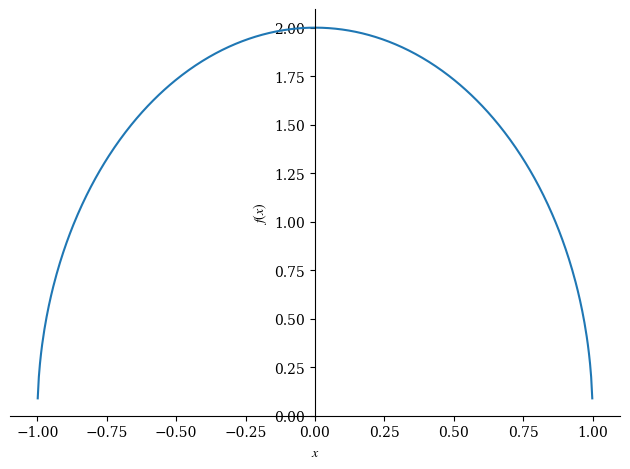

In [84]:
sympy.plot(f, (x, -2, 2));

In [85]:
val_sym = sympy.integrate(f, (x, a, b))

In [86]:
val_sym

In [87]:
mpmath.mp.dps = 75

In [88]:
f_mpmath = sympy.lambdify(x, f, "mpmath")

In [89]:
val = mpmath.quad(f_mpmath, (a, b))

In [90]:
sympy.sympify(val)

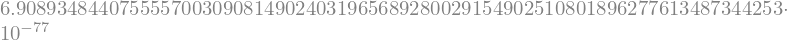

In [91]:
sympy.N(val_sym, mpmath.mp.dps + 1) - val

In [92]:
%timeit mpmath.quad(f_mpmath, [a, b])

1.46 ms ± 6.74 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [93]:
f_numpy = sympy.lambdify(x, f, "numpy")

In [94]:
%timeit integrate.quad(f_numpy, a, b)

116 μs ± 871 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### double and triple integrals

In [95]:
def f2(x, y):
    return np.cos(x) * np.cos(y) * np.exp(-(x**2) - y**2)


def f3(x, y, z):
    return np.cos(x) * np.cos(y) * np.cos(z) * np.exp(-(x**2) - y**2 - z**2)

In [96]:
integrate.dblquad(f2, 0, 1, lambda x: 0, lambda x: 1)

In [97]:
integrate.tplquad(f3, 0, 1, lambda x: 0, lambda x: 1, lambda x, y: 0, lambda x, y: 1)

In [98]:
x, y, z = sympy.symbols("x, y, z")

In [99]:
f2 = sympy.cos(x) * sympy.cos(y) * sympy.exp(-(x**2) - y**2)

In [100]:
f3 = sympy.cos(x) * sympy.cos(y) * sympy.cos(z) * sympy.exp(-(x**2) - y**2 - z**2)

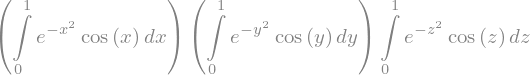

In [101]:
sympy.integrate(f3, (x, 0, 1), (y, 0, 1), (z, 0, 1))  # this does not succeed

In [102]:
f2_numpy = sympy.lambdify((x, y), f2, "numpy")

In [103]:
integrate.dblquad(f2_numpy, 0, 1, lambda x: 0, lambda x: 1)

In [104]:
f3_numpy = sympy.lambdify((x, y, z), f3, "numpy")

In [105]:
integrate.tplquad(
    f3_numpy, 0, 1, lambda x: 0, lambda x: 1, lambda x, y: 0, lambda x, y: 1
)

In [106]:
mpmath.mp.dps = 30

In [107]:
f2_mpmath = sympy.lambdify((x, y), f2, "mpmath")

In [108]:
res = mpmath.quad(f2_mpmath, (0, 1), (0, 1))
res

mpf('0.430564794306099099242308990195783')

In [109]:
f3_mpmath = sympy.lambdify((x, y, z), f3, "mpmath")

In [110]:
res = mpmath.quad(f3_mpmath, (0, 1), (0, 1), (0, 1))

In [111]:
sympy.sympify(res)

In [112]:
%time res = sympy.sympify(mpmath.quad(f3_mpmath, (0, 1), (0, 1), (0, 1)))

CPU times: user 38.8 s, sys: 14 μs, total: 38.8 s
Wall time: 38.9 s


## Line integrals

In [113]:
t, x, y = sympy.symbols("t, x, y")

In [114]:
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2 * sympy.pi))

In [115]:
sympy.line_integrate(1, C, [x, y])

In [116]:
sympy.line_integrate(x**2 * y**2, C, [x, y])

## Integral transformations

### Laplace transforms

In [117]:
s = sympy.symbols("s")

In [118]:
a, t = sympy.symbols("a, t", positive=True)

In [119]:
f = sympy.sin(a * t)

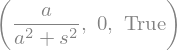

In [120]:
sympy.laplace_transform(f, t, s)

In [121]:
F = sympy.laplace_transform(f, t, s, noconds=True)

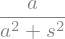

In [122]:
F

In [123]:
sympy.inverse_laplace_transform(F, s, t, noconds=True)

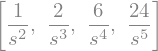

In [124]:
[sympy.laplace_transform(f, t, s, noconds=True) for f in [t, t**2, t**3, t**4]]

In [125]:
n = sympy.symbols("n", integer=True, positive=True)

In [126]:
sympy.laplace_transform(t**n, t, s, noconds=True)

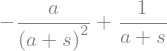

In [127]:
sympy.laplace_transform((1 - a * t) * sympy.exp(-a * t), t, s, noconds=True)

### Fourier Transforms

In [128]:
w = sympy.symbols("omega")

In [129]:
f = sympy.exp(-a * t**2)

In [130]:
F = sympy.fourier_transform(f, t, w)

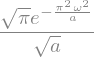

In [131]:
F

In [132]:
sympy.inverse_fourier_transform(F, w, t)

In [133]:
sympy.fourier_transform(sympy.cos(t), t, w)  # not good